# Assignment 1 - Logistic Regression

In [128]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## 1. Logistic Regression
### 1.1 Visualizing the Data

In [129]:
def plotData(data, label_x='Exam I Score', label_y='Exam II Score', 
             legend_pos='Admitted', legend_neg='Not Admitted', axes=None):
    pos = data[:, 2] == 1
    neg = data[:, 2] == 0
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=legend_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=legend_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

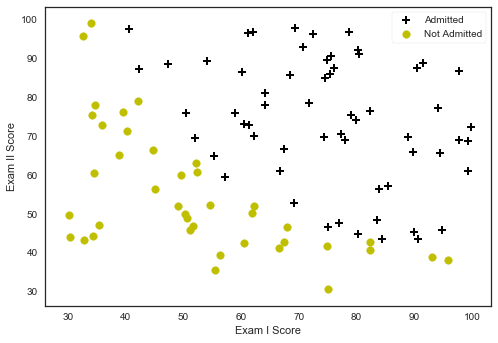

In [130]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',')
plotData(data)


In [131]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]
print y.shape

(100L, 1L)


### 1.2 Implementation
#### 1.2.1 Sigmoid function

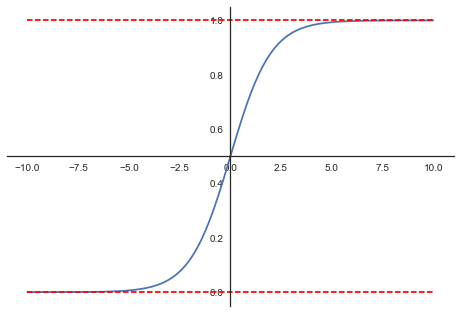

In [132]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 101)
sig = sigmoid(z)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
upperBound = np.ones(z.shape)
lowerBound = np.zeros(z.shape)
plt.plot(z, sig)
plt.plot(z, upperBound, 'r--', z, lowerBound, 'r--')
plt.show()

##### 1.2.2 
##### Cost Function
$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} [-y^{(i)}\log \big(h_\theta(x^{(i)})\big)-(1-y^{(i)})\log \big(1-h_\theta(x^{(i)})\big)]$$

In [133]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1.0/m * (y.T.dot(np.log(h)) + (1.0-y).T.dot(np.log(1.0-h)))
    
    return J[0]

theta = np.zeros(X.shape[1])
J = costFunction(theta, X, y)
print 'Cost:', J

Cost: 0.69314718056


##### Gradient of the cost
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\big(h_\theta(x^{(i)})-y^{(i)}\big)x^{(i)}_j$$

In [134]:
def gradient(theta, X, y):
    m = y.size
    # Pay attention to regular equation to vectorized equation.
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = 1.0/m * X.T.dot(h - y)
    return grad.flatten()

grad = gradient(theta, X, y)
print 'Gradient:', grad

Gradient: [ -0.1        -12.00921659 -11.26284221]


##### 1.2.3 Learning parameters

In [135]:
regr = minimize(costFunction, theta, args=(X, y), jac=gradient, 
                options= {'maxiter': 500})
regr


C:\Users\Joey\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log


      fun: 0.20349770158944375
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476824e-09,  -9.31921320e-07,  -2.82608931e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [136]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [137]:
print "Admission probability for students with 45 & 85:", sigmoid(np.array([1, 45, 85]).dot(regr.x.T))
p = predict(regr.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Admission probability for students with 45 & 85: 0.776290724059
Train accuracy 89%


##### 1.2.4 Evaluating logistic regression

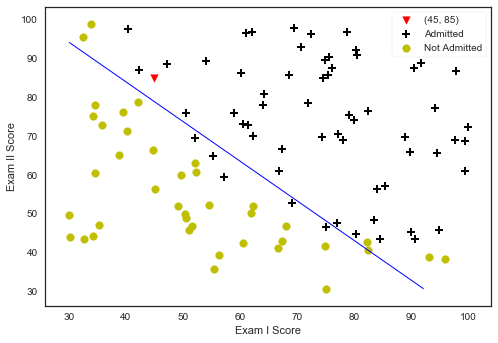

In [138]:
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.flatten(), xx2.flatten()].dot(regr.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data)

## Regularized logistic regression
### Visualizing the data

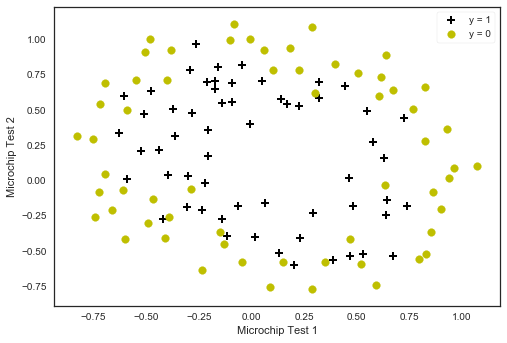

In [139]:
data2 = np.loadtxt('ex2/ex2data2.txt', delimiter=',')
plotData(data2, label_x="Microchip Test 1", label_y="Microchip Test 2",
         legend_pos="y = 1", legend_neg="y = 0")

X = data2[:,0:2]
y = np.c_[data2[:,2]]

In [140]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)
print XX.shape
print X.shape

(118L, 28L)
(118L, 2L)


In [141]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1.0-h).T.dot(1.0-y)) + (reg/(2.0*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])


initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.69314718055994529

In [151]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1.0/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

C:\Users\Joey\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


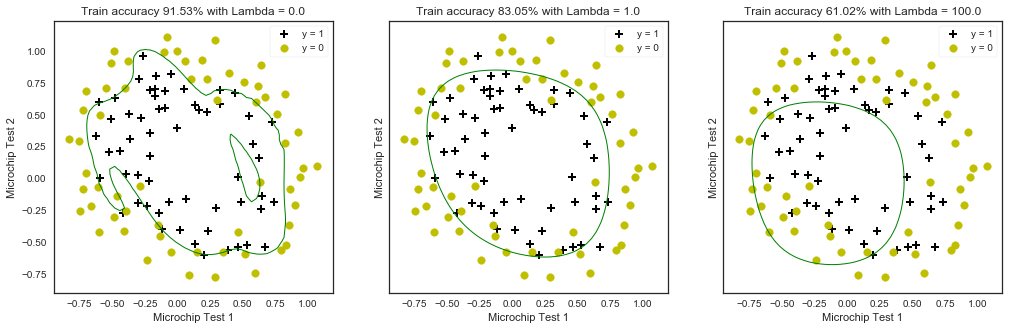

In [152]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0.0, 1.0, 100.0]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))